## Lab 2

### Part 3. Poetry generation

Let's try to generate some poetry using RNNs. 

You have several choices here: 

* The Shakespeare sonnets, file `sonnets.txt` available in the notebook directory.

* Роман в стихах "Евгений Онегин" Александра Сергеевича Пушкина. В предобработанном виде доступен по [ссылке](https://github.com/attatrol/data_sources/blob/master/onegin.txt).

* Some other text source, if it will be approved by the course staff.

Text generation can be designed in several steps:
    
1. Data loading.
2. Dictionary generation.
3. Data preprocessing.
4. Model (neural network) training.
5. Text generation (model evaluation).


In [32]:
import string
import os
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from random import sample

### Data loading: Shakespeare

Shakespeare sonnets are awailable at this [link](http://www.gutenberg.org/ebooks/1041?msg=welcome_stranger). In addition, they are stored in the same directory as this notebook (`sonnetes.txt`). Simple preprocessing is already done for you in the next cell: all technical info is dropped.

In [33]:
if not os.path.exists('sonnets.txt'):
    !wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_basic/homeworks_basic/lab02_deep_learning/sonnets.txt

with open('sonnets.txt', 'r') as iofile:
    text = iofile.readlines()
    
TEXT_START = 45
TEXT_END = -368
text = text[TEXT_START : TEXT_END]
text_str = text
assert len(text) == 2616

In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [34]:
# Join all the strings into one and lowercase it
#delete x,i,v,l
str = ""
for i in text:
    str += i
text = str.lower()


assert len(text) == 100225, 'Are you sure you have concatenated all the strings?'
assert not any([x in set(text) for x in string.ascii_uppercase]), 'Uppercase letters are present'
print('OK!')

OK!


In [35]:
symbol = sorted(set(text))
count_symbols = []
symbol_to_number = {}
for i in symbol:
    count = text.count(i)
    count_symbols.append(count)
    symbol_to_number[i] = count

In [36]:
len_str = list(map(len, text_str))

Text(0, 0.5, 'number')

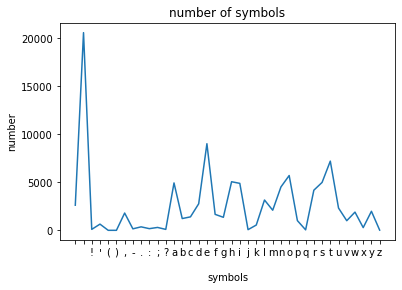

In [37]:
plt.plot(symbol_to_number.keys(), count_symbols)
plt.title("number of symbols")
plt.xlabel("symbols")
plt.ylabel("number")

Text(0, 0.5, 'the number of lines with this lengthh')

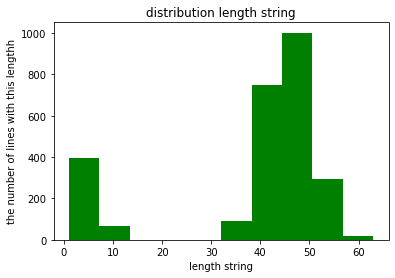

In [38]:
plt.hist(len_str, color="green")
plt.title("distribution length string")
plt.xlabel("length string")
plt.ylabel("the number of lines with this lengthh")

In [39]:
print(f"Max length string {np.array(len_str).max()}")

Max length string 63


### Data loading: "Евгений Онегин"


In [40]:
#!wget https://github.com/attatrol/data_sources.git
    
with open('onegin.txt', 'r', encoding="utf-8") as iofile:
    text = iofile.readlines()
    
text = [x.replace('\t\t', '') for x in text]

In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [41]:
str = ""
for i, s in enumerate(text):
    if (s.find("X") != 0 and s.find("I") != 0 and s.find("V") != 0 and s.find("L") != 0):
        str += s
        text[i] = text[i].lower()
    else:
        text[i] = ""
out = str.lower()

In [42]:
text

['\n',
 '',
 '\n',
 '«мой дядя самых честных правил,\n',
 'когда не в шутку занемог,\n',
 'он уважать себя заставил\n',
 'и лучше выдумать не мог.\n',
 'его пример другим наука;\n',
 'но, боже мой, какая скука\n',
 'с больным сидеть и день и ночь,\n',
 'не отходя ни шагу прочь!\n',
 'какое низкое коварство\n',
 'полуживого забавлять,\n',
 'ему подушки поправлять,\n',
 'печально подносить лекарство,\n',
 'вздыхать и думать про себя:\n',
 'когда же черт возьмет тебя!»\n',
 '\n',
 '\n',
 '\n',
 '',
 '\n',
 'так думал молодой повеса,\n',
 'летя в пыли на почтовых,\n',
 'всевышней волею зевеса\n',
 'наследник всех своих родных. —\n',
 'друзья людмилы и руслана!\n',
 'с героем моего романа\n',
 'без предисловий, сей же час\n',
 'позвольте познакомить вас:\n',
 'онегин, добрый мой приятель,\n',
 'родился на брегах невы,\n',
 'где, может быть, родились вы\n',
 'или блистали, мой читатель;\n',
 'там некогда гулял и я:\n',
 'но вреден север для меня\n',
 '\n',
 '\n',
 '',
 '\n',
 'служив отлично

In [43]:
symbol = sorted(set(out))
count_symbols = []
symbol_to_number = {}
for i in symbol:
    count = out.count(i)
    count_symbols.append(count)
    symbol_to_number[i] = count

In [44]:
len_str = list(map(len, text))

Text(0, 0.5, 'number')

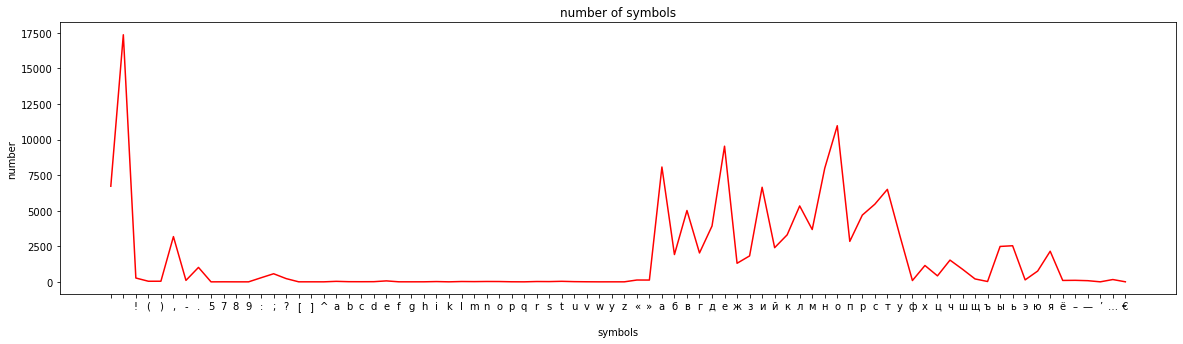

In [45]:
plt.subplots(figsize=(20,5))
plt.plot(symbol_to_number.keys(), count_symbols, color="red")
plt.title("number of symbols")
plt.xlabel("symbols")
plt.ylabel("number")

Text(0, 0.5, 'the number of lines with this lengthh')

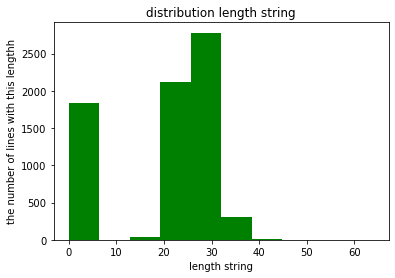

In [46]:
plt.hist(len_str, color="green")
plt.title("distribution length string")
plt.xlabel("length string")
plt.ylabel("the number of lines with this lengthh")

In [47]:
print(f"Max length string {np.array(len_str).max()}")

Max length string 64


Put all the characters, that you've seen in the text, into variable `tokens`.

In [48]:
tokens = sorted(set(out))

tokens.append('<')
tokens.append('>')
tokens.append('_')

Create dictionary `token_to_idx = {<char>: <index>}` and dictionary `idx_to_token = {<index>: <char>}`

In [49]:
# dict <index>:<char>
token_to_idx = {elem : num for num, elem in enumerate(tokens)}
# dict <char>:<index>
idx_to_token = {num : elem for num, elem in enumerate(tokens)}

In [50]:
num_tokens = len(tokens)

*Comment: in this task we have only 38 different tokens, so let's use one-hot encoding.*

In [51]:
#составляем матрицу из идентификаторов символов из тех строк которые передали
def to_matrix(string, max_len=None, pad=token_to_idx['_'], dtype='int32', batch_first=True):
    max_len = max_len or np.array(list(map(len, string))).max()
    max_len += 1
    strings_ix = np.zeros([len(string), max_len], dtype) + pad #empty matrix with PAD
    strings_ix[:, 0] = token_to_idx['<'] # <SOS>

    for i in range(len(string)):
        line_ix = [token_to_idx[c] for c in string[i]]
        strings_ix[i, 1:len(line_ix)] = line_ix[1:]
        strings_ix[i, len(line_ix)] = token_to_idx['>'] # <EOS>
    
    if not batch_first: #convert [batch, time] into [time, batch]
        strings_ix = np.transpose(strings_ix)
    
    return strings_ix


### Building the model

Now we want to build and train recurrent neural net which would be able to something similar to Shakespeare's poetry.

Let's use vanilla RNN, similar to the one created during the lesson.

In [52]:
import torch, torch.nn as nn
import torch.nn.functional as F
import torchmetrics as metrics

In [53]:
class CharRNNCell(nn.Module):
    def __init__(self, num_tokens=len(tokens), embedding_size=18, run_num_units=64):
        super(self.__class__, self).__init__()
        self.num_units = run_num_units

        self.embedding = nn.Embedding(num_tokens, embedding_size)
        self.rnn_update = nn.Linear(embedding_size + run_num_units, run_num_units)
        self.rnn_to_logits = nn.Linear(run_num_units, num_tokens)

    def forward(self, x, h_prev):
        x_emb = self.embedding(x) #layer 1

        x_and_h = torch.cat([x_emb, h_prev], dim=-1) #concatination x and h
        h_next = self.rnn_update(x_and_h) #layer 2
        h_next = torch.tanh(h_next) #function activation

        assert h_next.size() == h_prev.size()

        logits = self.rnn_to_logits(h_next) #layer 3

        return h_next, logits

    def initial_state(self, batch_size):
        return torch.zeros(batch_size, self.num_units, requires_grad=True)



In [54]:
char_rnn = CharRNNCell()

In [55]:
def rnn_loop(char_rnn, batch_ix):
    batch_size, max_length = batch_ix.size()
    hid_state = char_rnn.initial_state(batch_size)
    logits = []

    for x_t in batch_ix.transpose(0, 1):
        hid_state, logits_next = char_rnn(x_t, hid_state)
        logits.append(logits_next)
    
    return torch.stack(logits, dim=1)

Plot the loss function (axis X: number of epochs, axis Y: loss function).

In [56]:
text[:10]

['\n',
 '',
 '\n',
 '«мой дядя самых честных правил,\n',
 'когда не в шутку занемог,\n',
 'он уважать себя заставил\n',
 'и лучше выдумать не мог.\n',
 'его пример другим наука;\n',
 'но, боже мой, какая скука\n',
 'с больным сидеть и день и ночь,\n']

tensor([[82, 83, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84,
         84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84],
        [83, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84,
         84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84],
        [82, 83, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84,
         84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84],
        [82, 56, 58, 53,  1, 48, 75, 48, 75,  1, 61, 44, 56, 71, 65,  1, 67, 49,
         61, 62, 57, 71, 65,  1, 59, 60, 44, 46, 52, 55,  5,  0, 83],
        [82, 58, 47, 48, 44,  1, 57, 49,  1, 46,  1, 68, 63, 62, 54, 63,  1, 51,
         44, 57, 49, 56, 58, 47,  5,  0, 83, 84, 84, 84, 84, 84, 84]])


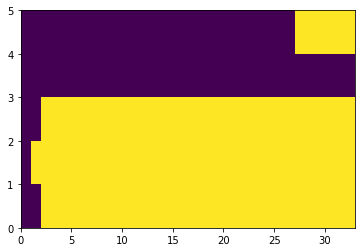

In [57]:
batch_ix = to_matrix(text[:5])
batch_ix = torch.tensor(batch_ix, dtype=torch.int64)

print(batch_ix)
plt.pcolormesh(batch_ix == 84)

In [58]:
logit_seq = rnn_loop(char_rnn, batch_ix)

In [59]:
len(tokens)

85

In [60]:
predictions_logits = logit_seq[:, :-1]
actual_next_tokens = batch_ix[:, 1:]

loss_func = nn.CrossEntropyLoss(ignore_index=token_to_idx['_'])
loss2 = loss_func(
    predictions_logits.reshape((-1, len(tokens))),
    actual_next_tokens.reshape(-1)
)

In [61]:
loss2.backward()

In [62]:
for w in char_rnn.parameters():
    assert w.grad is not None and torch.max(torch.abs(w.grad)).data.numpy() != 0, \
        "Loss is not differentiable w.r.t. a weight with shape %s. Check forward method." % (w.size(),)

In [63]:
MAX_LENGTH = np.array(len_str).max() #возможно +2 т.к. есть символы <EOS> and <SOS> 

In [64]:
char_rnn = CharRNNCell()
opt = torch.optim.Adam(char_rnn.parameters(), lr = 1e-3)
loss_func = nn.CrossEntropyLoss(ignore_index=token_to_idx['_'])

history = []

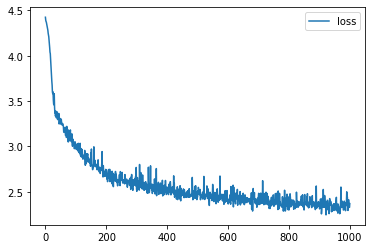

In [65]:
for i in range(1000):
    batch_ix = to_matrix(sample(text, 32), max_len=MAX_LENGTH)
    batch_ix = torch.tensor(batch_ix, dtype=torch.int64)

    logits_seq = rnn_loop(char_rnn, batch_ix)
    
    prediction_logits = logits_seq[:, :-1]
    actual_next_tokens = batch_ix[:, 1:]
    print(prediction_logits.shape)
    print(actual_next_tokens.shape)
    loss = loss_func(
        prediction_logits.reshape((-1, len(tokens))),
        actual_next_tokens.reshape(-1)
    )
    loss.backward()
    opt.step()
    opt.zero_grad()

    history.append(loss.data.numpy())
    if ((i+1)%100 == 0):
        clear_output(True)
        plt.plot(history, label="loss")
        plt.legend()
        plt.show()

In [66]:
assert np.mean(history[:10]) > np.mean(history[-10:]), "RNN didn't converge."

In [67]:
def generate_sample(char_rnn, seed_phrase=' ', max_length=MAX_LENGTH, temperature=1.0):
    '''
    ### Disclaimer: this is an example function for text generation.
    ### You can either adapt it in your code or create your own function
    
    The function generates text given a phrase of length at least SEQ_LENGTH.
    :param seed_phrase: prefix characters. The RNN is asked to continue the phrase
    :param max_length: maximum output length, including seed_phrase
    :param temperature: coefficient for sampling.  higher temperature produces more chaotic outputs, 
        smaller temperature converges to the single most likely output.
        
    Be careful with the model output. This model waits logits (not probabilities/log-probabilities)
    of the next symbol.
    '''
    
    x_sequence = [token_to_idx[token] for token in seed_phrase]
    x_sequence = torch.tensor([x_sequence], dtype=torch.int64)
    hid_state = char_rnn.initial_state(batch_size=1)
    
    #feed the seed phrase, if any
    for i in range(len(seed_phrase) - 1):
        hid_state, _ = char_rnn(x_sequence[:, i], hid_state)
    
    #start generating
    for _ in range(max_length - len(seed_phrase)):
        hid_state, logp_next = char_rnn(x_sequence[:, -1], hid_state)
        p_next = F.softmax(logp_next / temperature, dim=-1).data.numpy()[0]
        
        # sample next token and push it back into x_sequence
        next_ix = np.random.choice(len(tokens), p=p_next)
        next_ix = torch.tensor([[next_ix]], dtype=torch.int64)
        x_sequence = torch.cat([x_sequence, next_ix], dim=1)
        
    return ''.join([tokens[ix] for ix in x_sequence.data.numpy()[0]])

In [68]:
for _ in range(5):
    print(generate_sample(char_rnn,temperature=0.5, max_length=MAX_LENGTH))

 скружа в не годушин бедей горо стородятный вых сорди в предо гл
 баволь детькой воставити улить вералод ет былой, не половар
>, 
 поворав!
> стученны, ложий плимой знебовись и малой бодна серед
 прона водым не стради придала и ледной пердень
> слей веля не п
 недал и тан и тводой,
> дотрушит в зростих не водоль не властой


### More poetic model

Let's use LSTM instead of vanilla RNN and compare the results.

Plot the loss function of the number of epochs. Does the final loss become better?

In [69]:
a = nn.Embedding(4, 10)
next(a.parameters())

Parameter containing:
tensor([[ 4.0190e-01,  1.7675e-01, -2.4956e-01,  7.3948e-01, -6.5558e-02,
          5.0884e-02, -8.5006e-01, -3.5413e-01,  8.5278e-01, -7.1137e-01],
        [ 3.4254e-01,  1.2352e+00, -5.0707e-01, -1.3495e-01,  4.0794e-01,
          1.2175e+00,  1.1658e+00, -7.7036e-01, -6.3295e-01, -2.0270e+00],
        [ 1.9615e+00,  1.2356e-02, -5.9382e-01,  2.9902e-01, -5.5986e-01,
          8.8123e-01, -2.1014e+00,  1.4958e+00,  3.5543e-01,  2.2921e+00],
        [ 5.1488e-01,  5.3056e-01, -3.0417e-01, -1.1868e+00, -1.2111e+00,
         -2.1323e-03, -1.8536e+00,  2.1648e-01, -2.2761e-01,  1.1294e+00]],
       requires_grad=True)

In [70]:
class CharLSTMCell(nn.Module):
    def __init__(self, num_tokens=len(tokens), embedding_size=18, lstm_num_units=64):
        super(self.__class__, self).__init__()
        self.num_units = lstm_num_units

        self.embedding = nn.Embedding(num_tokens, embedding_size)
        self.lstm_f_update = nn.Linear(embedding_size + lstm_num_units, lstm_num_units) 
        self.lstm_c_update = nn.Linear(embedding_size + lstm_num_units, lstm_num_units)
        self.lstm_o_update = nn.Linear(embedding_size + lstm_num_units, lstm_num_units)
        self.lstm_i_update = nn.Linear(embedding_size + lstm_num_units, lstm_num_units)
        self.lstm_to_logits = nn.Linear(lstm_num_units, num_tokens)

        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()

    def forward(self, x, hid_cid):
        #get vector embedding
        x_emb = self.embedding(x)

        x_and_h = torch.cat([x_emb, hid_cid[0]], dim=-1) #это конкатенация, объединение двух масивов в 1 последовательно

        #compute f_t
        f_t = self.lstm_f_update(x_and_h)
        f_t = self.sigmoid(f_t)

        #compute i_t_1 and i_t_2
        i_t = self.lstm_i_update(x_and_h)
        i_t_1 = self.sigmoid(i_t)
        i_t_2 = self.tanh(i_t)
        i_t = torch.multiply(i_t_1, i_t_2)

        #compute o_t
        o_t = self.lstm_o_update(x_and_h)
        o_t = self.sigmoid(o_t)

        #compute c_t (hidden layer, i don't find this computing on scheme, but they exist in formuls in my notebook)
        c_t = self.lstm_c_update(x_and_h)
        c_t = self.sigmoid(c_t)

        #compute c_next
        c_next = torch.multiply(f_t, hid_cid[1])
        c_next = c_next + i_t + c_t

        #compute h_next
        h_next = torch.multiply(self.tanh(c_next), o_t)

        #compute logits
        logits = self.lstm_to_logits(h_next)

        tensor_return = list([h_next, c_next])

        return tensor_return, logits
    
    def initial_state(self, batch_size):
        hid_initial = torch.zeros(batch_size, self.num_units, requires_grad=True)
        cid_initial = torch.zeros(batch_size, self.num_units, requires_grad=True)
        return list([hid_initial, cid_initial])

In [71]:
def lstm_loop(char_lstm, batch_ix):
    batch_size, max_length = batch_ix.size()
    state_hid_cid = char_lstm.initial_state(batch_size)
    logits = []

    for x_t in batch_ix.transpose(0, 1):
        state_hid_cid, logits_next = char_lstm(x_t, state_hid_cid)
        logits.append(logits_next)
    
    return torch.stack(logits, dim=1)

Check working backward and lstm

In [72]:
char_lstm = CharLSTMCell()

batch_ix = to_matrix(text[:5])
batch_ix = torch.tensor(batch_ix, dtype=torch.int64)

logit_seq = lstm_loop(char_lstm, batch_ix)

In [73]:
predictions_logits = logit_seq[:, :-1]
actual_next_tokens = batch_ix[:, 1:]

loss_func = nn.CrossEntropyLoss(ignore_index=token_to_idx['_'])
loss2 = loss_func(
    predictions_logits.reshape((-1, num_tokens)),
    actual_next_tokens.reshape(-1)
    )

loss2.backward()

In [74]:
for w in char_lstm.parameters():
    assert w.grad is not None and torch.max(torch.abs(w.grad)).data.numpy() != 0, \
        "Loss is not differentiable w.r.t. a weight with shape %s. Check forward method." % (w.size(),)

Train and plot loss

In [75]:
char_lstm = CharLSTMCell()
opt = torch.optim.Adam(char_lstm.parameters(), lr=1e-3)
loss_func = nn.CrossEntropyLoss(ignore_index=token_to_idx['_'])

history = []
MAX_LENGTH = np.array(len_str).max()

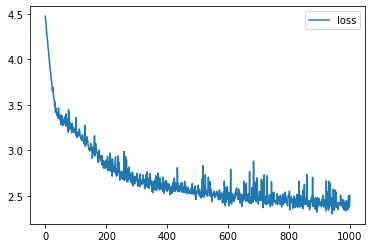

In [76]:
for i in range(1000):
    #creating a table of tokens
    batch_ix = to_matrix(sample(text, 32), max_len=MAX_LENGTH)
    batch_ix = torch.tensor(batch_ix, dtype=torch.int64)

    logits_seq = lstm_loop(char_lstm, batch_ix)

    prediction_logits = logits_seq[:, :-1]
    actual_next_tokens = batch_ix[:, 1:]    
    loss = loss_func(
        prediction_logits.reshape((-1, len(tokens))), #почему блять num_tokens не работало, чему это говно равно???
        actual_next_tokens.reshape(-1)
    )
    loss.backward()
    opt.step()
    opt.zero_grad()

    history.append(loss.data.numpy())
    if ((i+1)%100 == 0):
        clear_output(True)
        plt.plot(history, label="loss")
        plt.legend()
        plt.show()



In [77]:
assert np.mean(history[:10]) > np.mean(history[-10:]), "RNN didn't converge."

Generate text using the trained net with different `temperature` parameter: `[0.1, 0.2, 0.5, 1.0, 2.0]`.

Evaluate the results visually, try to interpret them.

In [ ]:
for _ in range(5):
    print(generate_sample(char_lstm,temperature=0.1, max_length=MAX_LENGTH))

### Saving and loading models

Save the model to the disk, then load it and generate text. Examples are available [here](https://pytorch.org/tutorials/beginner/saving_loading_models.html]).

In [79]:
# function for save and load model, opt with all parametrs
def save_chekpoint(checkpoint_path, model, optimizer):
    state = {
        'state_dict': model.state_dict(),
        'optimizer': optimizer.state_dict()}

    torch.save(state, checkpoint_path)
    print('model saved to %s' % checkpoint_path)

def load_checkpoint(checkpoint_path, model, optomizer):
    state = torch.load(checkpoint_path)
    model.load_state_dict(state['state_dicct'])
    optomizer.load_state_dict(state['optimizer'])
    print('model loaded from %' % checkpoint_path)

In [80]:
save_chekpoint('./lstm_model.pth', char_lstm, opt)


model saved to ./lstm_model.pth


In [81]:
#load_checkpoint('./lstm_model.pth', model2, opt2) #download modle

### References
1. <a href='http://karpathy.github.io/2015/05/21/rnn-effectiveness/'> Andrew Karpathy blog post about RNN. </a> 
There are several examples of genration: Shakespeare texts, Latex formulas, Linux Sourse Code and children names.
2. <a href='https://github.com/karpathy/char-rnn'> Repo with char-rnn code </a>
3. Cool repo with PyTorch examples: [link](https://github.com/spro/practical-pytorch`)